In [94]:
## Note : - In below problem target variable is "Churn" and if the value of Churn = 0 that means that customer will not move
## and if the value of Churn = 1 thats means that Customer will move out.

## Importin Libraries
import os 
import pandas as pd
import numpy as np
import tensorflow
from fancyimpute import KNN
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [95]:
## Setting the working directory
os.chdir("D:/Data Science/Projects/Project 1 Python")

In [96]:
os.getcwd()

'D:\\Data Science\\Projects\\Project 1 Python'

In [97]:
## Reading test and train data
train_data = pd.read_csv("Train_data.csv")
test_data=pd.read_csv("Test_data.csv")

In [98]:
train_data.shape

(3333, 21)

In [99]:
test_data.shape

(1667, 21)

In [100]:
## Combining test and train data for Exploratory Data Analysis
full_data = pd.concat([train_data,test_data],ignore_index=True)

In [101]:
full_data.shape

(5000, 21)

In [102]:
full_data.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [103]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
state                            5000 non-null object
account length                   5000 non-null int64
area code                        5000 non-null int64
phone number                     5000 non-null object
international plan               5000 non-null object
voice mail plan                  5000 non-null object
number vmail messages            5000 non-null int64
total day minutes                5000 non-null float64
total day calls                  5000 non-null int64
total day charge                 5000 non-null float64
total eve minutes                5000 non-null float64
total eve calls                  5000 non-null int64
total eve charge                 5000 non-null float64
total night minutes              5000 non-null float64
total night calls                5000 non-null int64
total night charge               5000 non-null float64
total intl minutes           

In [104]:
## Removing the unwanted features

full_data = full_data.drop(['area code','state','phone number'],axis=1)

In [105]:
full_data.columns

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'number customer service calls', 'Churn'],
      dtype='object')

In [106]:
## Providing labels to categorical variable

lis=[]
for i in range (0, full_data.shape[1]):
        if(full_data.iloc[:,i].dtypes == 'object'):
            full_data.iloc[:,i]=pd.Categorical(full_data.iloc[:,i])
            full_data.iloc[:,i]=full_data.iloc[:,i].cat.codes
            full_data.iloc[:,i]=full_data.iloc[:,i].astype('object')
            lis.append(full_data.columns[i])

In [107]:
full_data.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [108]:
## Missing Value Analysis
missing_val = pd.DataFrame(fd_copy.isnull().sum())
missing_val

,0
account length,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total eve minutes,0
total eve calls,0
total night minutes,0
total night calls,0


In [109]:
## Feature Engineering
full_data['total minutes'] = full_data['total day minutes']+full_data['total eve minutes']+full_data['total night minutes']+full_data['total intl minutes']
full_data['total calls'] =  full_data['total day calls']+full_data['total eve calls']+full_data['total night calls']+full_data['total intl calls']
full_data['avg time spent'] = full_data['total minutes']/full_data['total calls']

In [110]:
full_data.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn,total minutes,total calls,avg time spent
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,0,717.2,303,2.366997
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,0,625.2,332,1.883133
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,0,539.4,333,1.619820
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,0,564.8,255,2.214902
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,0,512.0,359,1.426184


In [111]:
full_data = full_data[['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'number customer service calls',
       'total minutes', 'total calls', 'avg time spent', 'Churn']]

In [112]:
## Create the list of numeric Variable
list_numeric_data = []
for i in range(0, full_data.shape[1]):
    if full_data.iloc[:,i].dtypes in ('float64','int64'):
        list_numeric_data.append(full_data.columns[i])

In [113]:
list_numeric_data

['account length',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'number customer service calls',
 'total minutes',
 'total calls',
 'avg time spent']

In [114]:
lis

['international plan', 'voice mail plan', 'Churn']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016AA3D15048>,
      dtype=object)

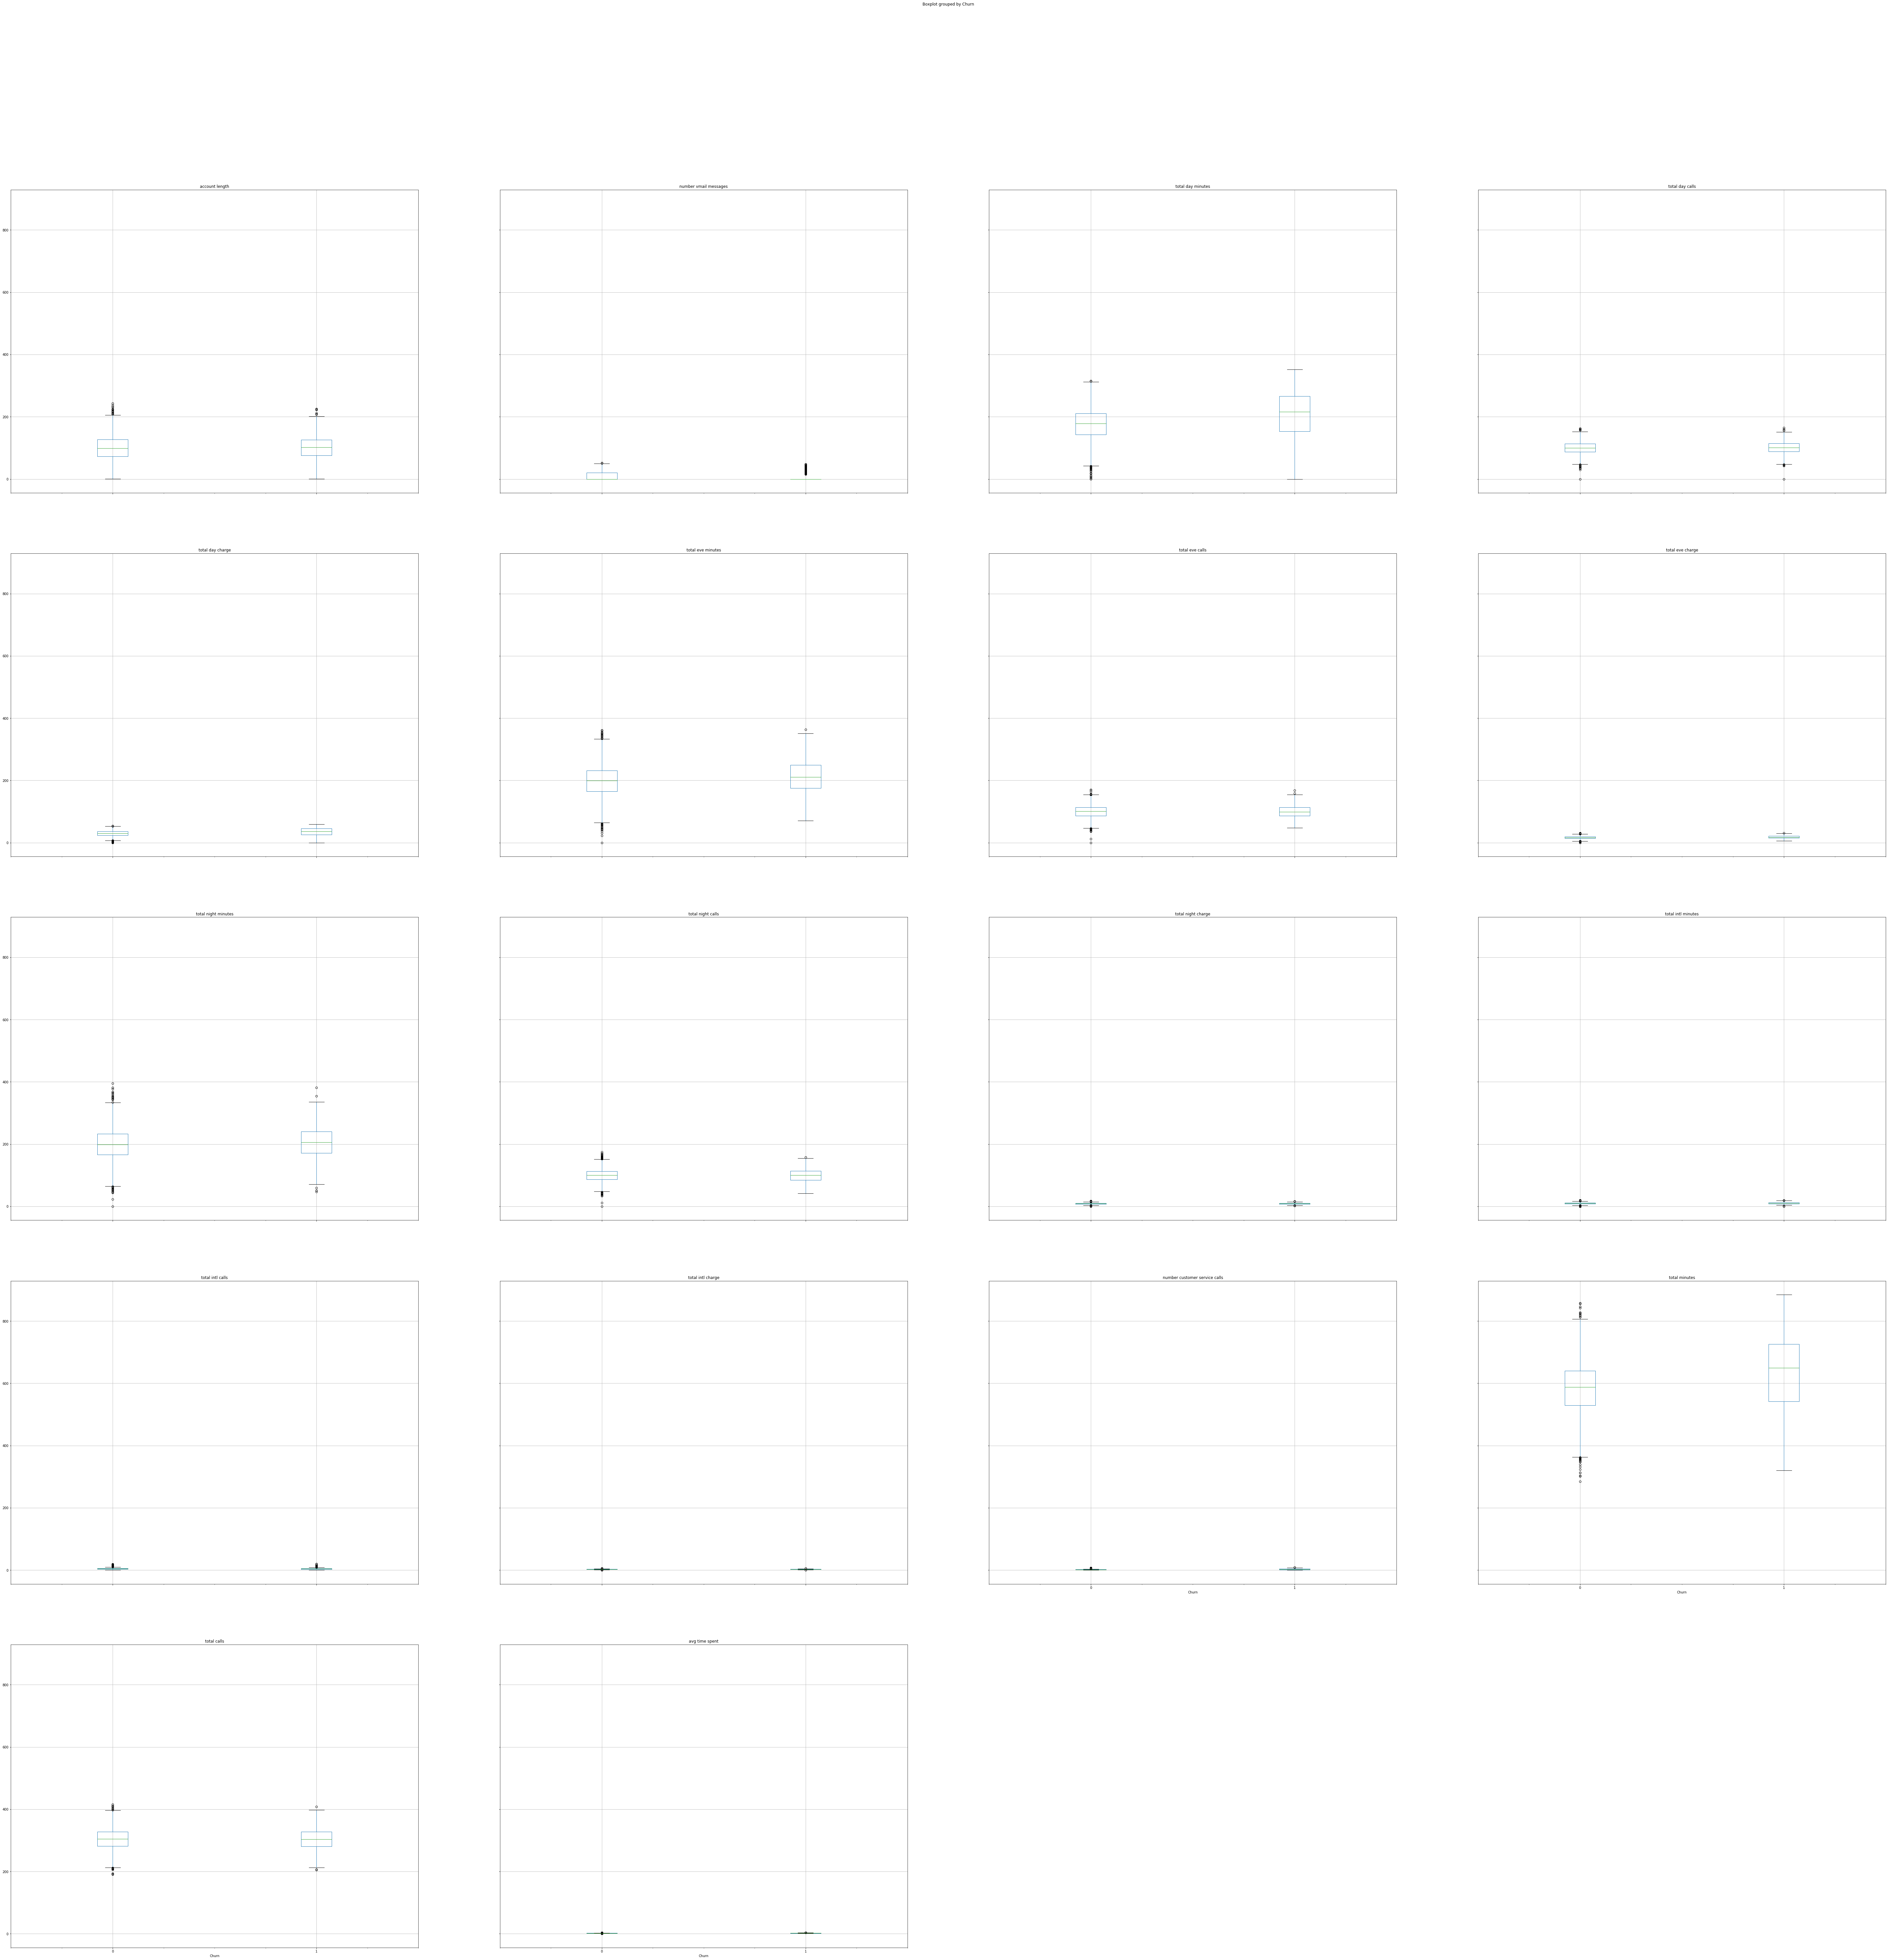

In [115]:
## Creating Box Plot for Outlier Analysis
full_data.boxplot(column=list_numeric_data,by='Churn',figsize = (100,100))

In [116]:
fd_copy = full_data

In [117]:
fd_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
account length                   5000 non-null int64
international plan               5000 non-null object
voice mail plan                  5000 non-null object
number vmail messages            5000 non-null int64
total day minutes                5000 non-null float64
total day calls                  5000 non-null int64
total day charge                 5000 non-null float64
total eve minutes                5000 non-null float64
total eve calls                  5000 non-null int64
total eve charge                 5000 non-null float64
total night minutes              5000 non-null float64
total night calls                5000 non-null int64
total night charge               5000 non-null float64
total intl minutes               5000 non-null float64
total intl calls                 5000 non-null int64
total intl charge                5000 non-null float64
number customer service cal

In [118]:
## Outlier Analysis
for i in list_numeric_data:
    print(i)
    #Extract Quartiles
    q75,q25=np.percentile(fd_copy.loc[:,i],[ 75,25])
    
    #Calculate IQR
    iqr = q75-q25
    
    #Calculating Minimum and Maximum values or Inner and Outer fence
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    #Replacing Outliers with NA
    fd_copy.loc[fd_copy[i] < min,i] = np.nan
    fd_copy.loc[fd_copy[i] > max,i] = np.nan

account length
-8.0
208.0
number vmail messages
-25.5
42.5
total day minutes
34.94999999999999
324.95
total day calls
48.0
152.0
total day charge
5.949999999999999
55.230000000000004
total eve minutes
64.78750000000001
335.6875
total eve calls
46.5
154.5
total eve charge
5.5000000000000036
28.539999999999996
total night minutes
65.20000000000003
336.4
total night calls
48.0
152.0
total night charge
2.9349999999999987
15.135000000000002
total intl minutes
3.25
17.25
total intl calls
-1.5
10.5
total intl charge
0.8899999999999992
4.65
number customer service calls
-0.5
3.5
total minutes
349.9625000000003
833.2624999999996
total calls
213.0
397.0
avg time spent
0.9706730311093518
2.9326104752166073


In [119]:
## Checking Missing Values in Data Frame after outlier Analysis
missing_val = pd.DataFrame(fd_copy.isnull().sum())

In [120]:
missing_val

,0
account length,24
international plan,0
voice mail plan,0
number vmail messages,60
total day minutes,34
total day calls,35
total day charge,34
total eve minutes,43
total eve calls,27
total eve charge,42


In [121]:
## Imputing missing values in dataframe using KNN-imputation
fd_copy = pd.DataFrame(KNN(k =5).fit_transform(fd_copy), columns = fd_copy.columns)

Imputing row 1/5000 with 0 missing, elapsed time: 6.781
Imputing row 101/5000 with 1 missing, elapsed time: 6.784
Imputing row 201/5000 with 0 missing, elapsed time: 6.786
Imputing row 301/5000 with 0 missing, elapsed time: 6.788
Imputing row 401/5000 with 0 missing, elapsed time: 6.790
Imputing row 501/5000 with 0 missing, elapsed time: 6.792
Imputing row 601/5000 with 0 missing, elapsed time: 6.794
Imputing row 701/5000 with 0 missing, elapsed time: 6.796
Imputing row 801/5000 with 0 missing, elapsed time: 6.797
Imputing row 901/5000 with 0 missing, elapsed time: 6.800
Imputing row 1001/5000 with 0 missing, elapsed time: 6.802
Imputing row 1101/5000 with 0 missing, elapsed time: 6.804
Imputing row 1201/5000 with 1 missing, elapsed time: 6.805
Imputing row 1301/5000 with 0 missing, elapsed time: 6.808
Imputing row 1401/5000 with 2 missing, elapsed time: 6.810
Imputing row 1501/5000 with 0 missing, elapsed time: 6.811
Imputing row 1601/5000 with 0 missing, elapsed time: 6.812
Imputing 

In [122]:
missing_val = pd.DataFrame(fd_copy.isnull().sum())

In [123]:
missing_val

,0
account length,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0
total eve minutes,0
total eve calls,0
total eve charge,0


In [124]:
### Feature Selection

tr_data_cor= fd_copy.loc[:,list_numeric_data]

In [125]:
list_numeric_data

['account length',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'number customer service calls',
 'total minutes',
 'total calls',
 'avg time spent']

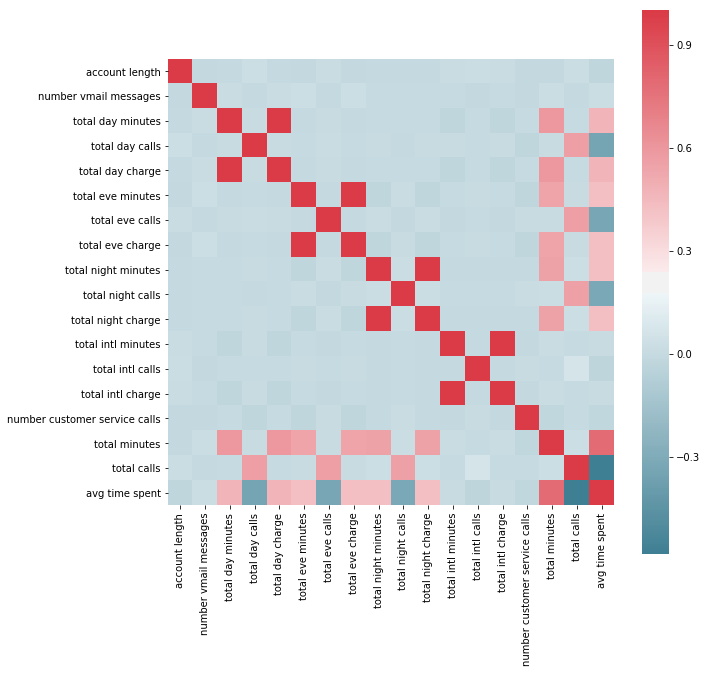

In [126]:
### Setting the width and Height
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = tr_data_cor.corr()

#Plot using seaborn library

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [127]:
#Chi-square test for Categorical Variable
lis.remove('Churn')
for i in lis:
    print(i)
    chi2,p,dof,ex = chi2_contingency(pd.crosstab(fd_copy['Churn'], fd_copy[i]))
    print(p)

international plan
1.9443947474998577e-74
voice mail plan
7.164501780988496e-15


In [128]:
## Drop Variables which are dependent on other variables
fd_copy = fd_copy.drop(['total day charge', 'total eve charge','total night charge','total intl charge'],axis=1)

In [129]:
fd_copy.columns

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total eve minutes', 'total eve calls', 'total night minutes',
       'total night calls', 'total intl minutes', 'total intl calls',
       'number customer service calls', 'total minutes', 'total calls',
       'avg time spent', 'Churn'],
      dtype='object')

In [130]:
## Separating train and test data after performing EDA

train=fd_copy.iloc[0:3333,:]
test=fd_copy.iloc[3333:5000,:]
test= test.reset_index(drop=True)

In [131]:
train.shape

(3333, 17)

In [132]:
test.shape

(1667, 17)

In [133]:
train.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,number customer service calls,total minutes,total calls,avg time spent,Churn
0,128.0,0.0,1.0,25.0,265.1,110.0,197.400000,99.0,244.7,91.0,10.0,3.0,1.0,717.2,303.0,2.366997,0.0
1,107.0,0.0,1.0,26.0,161.6,123.0,195.500000,103.0,254.4,103.0,13.7,3.0,1.0,625.2,332.0,1.883133,0.0
2,137.0,0.0,0.0,0.0,243.4,114.0,121.200000,110.0,162.6,104.0,12.2,5.0,0.0,539.4,333.0,1.619820,0.0
3,84.0,1.0,0.0,0.0,299.4,71.0,149.666075,88.0,196.9,89.0,6.6,7.0,2.0,564.8,255.0,2.214902,0.0
4,75.0,1.0,0.0,0.0,166.7,113.0,148.300000,122.0,186.9,121.0,10.1,3.0,3.0,512.0,359.0,1.426184,0.0


In [134]:
## Decision Tree Model 
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

In [135]:
fd_copy_1 = fd_copy

In [136]:
## Decision tree Model
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(train.values[:,0:16],train.values[:,16])

In [137]:
C50_Predictions = C50_model.predict(test.values[:,0:16])

In [138]:
C50_Predictions

array([1., 0., 0., ..., 0., 0., 0.])

In [139]:
## Evaluating the Decision Tree Model
ConfMat_C50 = pd.crosstab(test.values[:,16],C50_Predictions)

TN = ConfMat_C50.iloc[0,0]
FN = ConfMat_C50.iloc[1,0]
TP = ConfMat_C50.iloc[1,1]
FP = ConfMat_C50.iloc[0,1]

Accuracy_C50 = ((TP+TN)*100)/(TP+TN+FP+FN)
FNR_C50 = (FN*100)/(FN+TP)

#Accuracy 91.00
#FNR 32.14

In [140]:
Accuracy_C50

91.00179964007198

In [141]:
FNR_C50

32.142857142857146

In [147]:
#Random Forest Model

from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 1000).fit(train.values[:,0:16], train.values[:,16])

In [148]:
RF_Predictions = RF_model.predict(test.values[:,0:16])

In [149]:
## Evaluating the Random Forest Model
ConfMat_RF = pd.crosstab(test.values[:,16],RF_Predictions)

TN = ConfMat_RF.iloc[0,0]
FN = ConfMat_RF.iloc[1,0]
TP = ConfMat_RF.iloc[1,1]
FP = ConfMat_RF.iloc[0,1]

Accuracy_RF = ((TP+TN)*100)/(TP+TN+FP+FN)
FNR_RF = (FN*100)/(FN+TP)

#Accuracy 94.48
#FNR 38.28

In [150]:
Accuracy_RF

94.48110377924415

In [151]:
FNR_RF

38.839285714285715

In [152]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(train.values[:,0:16], train.values[:,16])

In [153]:
NB_Predictions = NB_model.predict(test.values[:,0:16])

In [154]:
## Evaluating the Naive Bayes Model

ConfMat_NB=pd.crosstab(test.values[:,16],NB_Predictions)

TN = ConfMat_NB.iloc[0,0]
FN = ConfMat_NB.iloc[1,0]
TP = ConfMat_NB.iloc[1,1]
FP = ConfMat_NB.iloc[0,1]

Accuracy_NB = ((TP+TN)*100)/(TP+TN+FP+FN)
FNR_NB = (FN*100)/(FN+TP)

##Accuracy = 88.66
## FNR = 43.75

In [155]:
Accuracy_NB

88.6622675464907

In [156]:
FNR_NB

43.75

In [157]:
fd_copy_1 =fd_copy

In [158]:
fd_copy_1['Churn'] = fd_copy_1['Churn'].astype('object')
fd_copy_1['international plan'] =fd_copy_1['international plan'].astype('object')
fd_copy_1['voice mail plan'] = fd_copy_1['voice mail plan'].astype('object')

In [159]:
## Preparing data for Logistic Regression Model

logit_reg_model = pd.DataFrame(fd_copy_1['Churn'])

In [160]:
list_numeric_data.remove('total day charge')
list_numeric_data.remove('total eve charge')
list_numeric_data.remove('total night charge')
list_numeric_data.remove('total intl charge')

In [161]:
#Add continous variables
logit_reg_model = logit_reg_model.join(fd_copy_1[list_numeric_data])

In [162]:
# Creating dummies for categorical variables
for i in lis:
    temp = pd.get_dummies(fd_copy_1[i], prefix = i)
    logit_reg_model = logit_reg_model.join(temp)

In [163]:
logit_reg_model.tail()

,Churn,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,number customer service calls,total minutes,total calls,avg time spent,international plan_0.0,international plan_1.0,voice mail plan_0.0,voice mail plan_1.0
4995,0,50.0,40.0,235.7,127.0,223.0,126.0,297.5,116.0,9.9,5.000000,2.0,766.1,374.0,2.048396,1,0,0,1
4996,1,152.0,0.0,184.2,90.0,256.8,73.0,213.6,113.0,14.7,2.000000,3.0,669.3,278.0,2.407554,1,0,1,0
4997,0,61.0,0.0,140.6,89.0,172.8,128.0,212.4,97.0,13.6,4.000000,1.0,539.4,318.0,1.696226,1,0,1,0
4998,0,109.0,0.0,188.8,67.0,171.7,92.0,224.4,89.0,8.5,6.000000,0.0,593.4,254.0,2.336220,1,0,1,0
4999,0,86.0,34.0,129.4,102.0,267.1,104.0,154.8,100.0,9.3,3.776559,0.0,560.6,322.0,1.740994,1,0,0,1


In [164]:
## Separating train and test data
train_LR = logit_reg_model.iloc[0:3333,]
test_LR = logit_reg_model.iloc[3333:5000,]
test_LR = test_LR.reset_index(drop=True)

In [165]:
test_LR.shape

(1667, 19)

In [166]:
train_LR.shape

(3333, 19)

In [167]:
## Storing column names of independent variables
train_LR_cols = train_LR.columns[1:19]

In [168]:
#Built Logistic Regression
import statsmodels.api as sm

logit = sm.Logit(train_LR['Churn'].astype('float'), train_LR[train_LR_cols].astype('float')).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.347687
         Iterations 7


C:\Users\Hitesh Juneja\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Hitesh Juneja\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Hitesh Juneja\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Hitesh Juneja\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3316
Method:                           MLE   Df Model:                           16
Date:                Mon, 03 Dec 2018   Pseudo R-squ.:                  0.1597
Time:                        00:19:40   Log-Likelihood:                -1158.8
converged:                       True   LL-Null:                       -1379.1
                                        LLR p-value:                 1.085e-83
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
account length                    0.0008      0.001      0.554      0.580      -0.002       0.003
number vmail messages             0.0267      0.017      1.570      0.116      -0.007       0.060
total day minutes                 0.0016      0.004      0.420      0.675      -0.006       0.009
total day calls                   0.0061      0.008      0.748      0.454      -0.010       0.022
total eve minutes                -0.0043      0.004     -1.109      0.267      -0.012       0.003
total eve calls                   0.0036      0.008      0.437      0.662      -0.012       0.020
total night minutes              -0.0064      0.004     -1.651      0.099      -0.014       0.001
total night calls                 0.0037      0.008      0.441      0.659      -0.013       0.020
total intl minutes                0.0514      0.021      2.400      0.016       0.009       0.093
total intl calls                 -0.1115      0.028     -3.941      0.000      -0.167      -0.056
number customer service calls     0.0032      0.056      0.057      0.955      -0.107       0.114
total minutes                     0.0241      0.005      5.253      0.000       0.015       0.033
total calls                      -0.0316      0.009     -3.483      0.000      -0.049      -0.014
avg time spent                   -4.3393      0.986     -4.401      0.000      -6.272      -2.407
international plan_0.0            0.2347        nan        nan        nan         nan         nan
international plan_1.0            2.0920        nan        nan        nan         nan         nan
voice mail plan_0.0               1.9937        nan        nan        nan         nan         nan
voice mail plan_1.0               0.3330        nan        nan        nan         nan         nan
=================================================================================================
"""

In [169]:
#Predict test data
test_LR['Actual_prob'] = logit.predict(test_LR[train_LR_cols])

In [170]:
test_LR['ActualVal'] = 1
test_LR.loc[test_LR.Actual_prob < 0.5, 'ActualVal'] = 0

In [171]:
#Build confusion matrix
CM = pd.crosstab(test_LR['Churn'], test_LR['ActualVal'])

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
Accuracy_LR=((TP+TN)*100)/(TP+TN+FP+FN)

FNR_LR = (FN*100)/(FN+TP)

#Accuracy 87.58
#FNR 84.37

In [172]:
FNR_LR

84.375

In [173]:
Accuracy_LR

87.58248350329934